 # Religious Texts: NLP Series
 ## Sentiment Analysis of the Hinduism religious text, Bhagavad Gita

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabhjyoth.mattummal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabhjyoth.mattummal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import os
os.getcwd()

GITA = pd.read_excel('data/gita.xlsx', sheet_name='Bhagavad-Gita')
GITA.rename(columns = {'Enlgish Translation':'English Translation'}, inplace = True)
GITA

,S.No.,Title,Chapter,Verse,Sanskrit Anuvad,Hindi Anuvad,English Translation
0,1,Arjuna's Vishada Yoga,Chapter 1,Verse 1.1,धृतराष्ट्र उवाच । धर्मक्षेत्रे कुरुक्षेत्रे सम...,धृतराष्ट्र बोले- हे संजय! धर्मभूमि कुरुक्षेत्र...,"Dhrtarashtra asked of Sanjaya: O SANJAYA, what..."
1,2,Arjuna's Vishada Yoga,Chapter 1,Verse 1.2,सञ्जय उवाच । दृष्ट्वा तु पाण्डवानीकं व्यूढं दु...,संजय बोले- उस समय राजा दुर्योधन ने व्यूहरचनायु...,Sanjaya explained: Now seeing that the army of...
2,3,Arjuna's Vishada Yoga,Chapter 1,Verse 1.3,पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् । व...,हे आचार्य! आपके बुद्धिमान्‌ शिष्य द्रुपदपुत्र ...,"Behold O, Master, the mighty army of the sons ..."
3,4,Arjuna's Vishada Yoga,Chapter 1,Verse 1.4,अत्र शूरा महेष्वासा भीमार्जुनसमा युधि । युयुधा...,इस सेना में बड़े-बड़े धनुषों वाले तथा युद्ध मे...,"Present here are the mighty archers, peers or ..."
4,5,Arjuna's Vishada Yoga,Chapter 1,Verse 1.5,धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान् । पुर...,"धृष्टकेतु, चेकिताना, और काशी के बहादुर राजा, प...","Dhrishtaketu, Chekitana, and the valiant king ..."
...,...,...,...,...,...,...,...
695,696,Moksha-Sanyasa Yoga,Chapter 18,Verse 18.74,संजय उवाच । इत्यहं वासुदेवस्य पार्थस्य च महात्...,सञ्जय बोले —-इस प्रकार मैंने श्री वासुदेव के औ...,"Sanjaya concluded: Thus my dear King, I have r..."
696,697,Moksha-Sanyasa Yoga,Chapter 18,Verse 18.75,व्यासप्रसादाच्छ्रुतवानेतद्गुह्यमहं परम् । योगं...,श्री व्यास जी की कृपा से दिव्य दृष्टि पाकर मैं...,"By the kindness of the Holy poet, Ved O’Vyas, ..."
697,698,Moksha-Sanyasa Yoga,Chapter 18,Verse 18.76,राजन्संस्मृत्य संस्मृत्य संवादमिममद्भुतम् । के...,हे राजन् ! भगवान् श्रीकृष्ण और अर्जुन के इस रह...,"The more I recall these glorious words, my Kin..."
698,699,Moksha-Sanyasa Yoga,Chapter 18,Verse 18.77,तच्च संस्मृत्य संस्मृत्य रूपमत्यद्भुतं हरेः । ...,हे राजन् ! श्रीहरि के उस अत्यन्त विलक्षण रूप क...,"O My King, whenever I remember that most beaut..."


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
from tqdm import tqdm

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prabhjyoth.mattummal\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
analyser = SentimentIntensityAnalyzer()

def predict_with_VaderSentiment(text):
    snt = analyser.polarity_scores(text)  #Calling the polarity analyzer
    if snt["compound"] >= 0:
        snt = "POSITIVE"
    else: snt="NEGATIVE"
    return snt


# Testing the operation of the model
text = "the most hated"
predict_with_VaderSentiment(text)

'NEGATIVE'

In [6]:
tqdm.pandas()
GITA['Sentiment Analysis'] = GITA['English Translation'].progress_apply(predict_with_VaderSentiment)
GITA

100%|██████████| 700/700 [00:00<00:00, 3236.61it/s]


,S.No.,Title,Chapter,Verse,Sanskrit Anuvad,Hindi Anuvad,English Translation,Sentiment Analysis
0,1,Arjuna's Vishada Yoga,Chapter 1,Verse 1.1,धृतराष्ट्र उवाच । धर्मक्षेत्रे कुरुक्षेत्रे सम...,धृतराष्ट्र बोले- हे संजय! धर्मभूमि कुरुक्षेत्र...,"Dhrtarashtra asked of Sanjaya: O SANJAYA, what...",POSITIVE
1,2,Arjuna's Vishada Yoga,Chapter 1,Verse 1.2,सञ्जय उवाच । दृष्ट्वा तु पाण्डवानीकं व्यूढं दु...,संजय बोले- उस समय राजा दुर्योधन ने व्यूहरचनायु...,Sanjaya explained: Now seeing that the army of...,POSITIVE
2,3,Arjuna's Vishada Yoga,Chapter 1,Verse 1.3,पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् । व...,हे आचार्य! आपके बुद्धिमान्‌ शिष्य द्रुपदपुत्र ...,"Behold O, Master, the mighty army of the sons ...",POSITIVE
3,4,Arjuna's Vishada Yoga,Chapter 1,Verse 1.4,अत्र शूरा महेष्वासा भीमार्जुनसमा युधि । युयुधा...,इस सेना में बड़े-बड़े धनुषों वाले तथा युद्ध मे...,"Present here are the mighty archers, peers or ...",POSITIVE
4,5,Arjuna's Vishada Yoga,Chapter 1,Verse 1.5,धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान् । पुर...,"धृष्टकेतु, चेकिताना, और काशी के बहादुर राजा, प...","Dhrishtaketu, Chekitana, and the valiant king ...",POSITIVE
...,...,...,...,...,...,...,...,...
695,696,Moksha-Sanyasa Yoga,Chapter 18,Verse 18.74,संजय उवाच । इत्यहं वासुदेवस्य पार्थस्य च महात्...,सञ्जय बोले —-इस प्रकार मैंने श्री वासुदेव के औ...,"Sanjaya concluded: Thus my dear King, I have r...",POSITIVE
696,697,Moksha-Sanyasa Yoga,Chapter 18,Verse 18.75,व्यासप्रसादाच्छ्रुतवानेतद्गुह्यमहं परम् । योगं...,श्री व्यास जी की कृपा से दिव्य दृष्टि पाकर मैं...,"By the kindness of the Holy poet, Ved O’Vyas, ...",POSITIVE
697,698,Moksha-Sanyasa Yoga,Chapter 18,Verse 18.76,राजन्संस्मृत्य संस्मृत्य संवादमिममद्भुतम् । के...,हे राजन् ! भगवान् श्रीकृष्ण और अर्जुन के इस रह...,"The more I recall these glorious words, my Kin...",POSITIVE
698,699,Moksha-Sanyasa Yoga,Chapter 18,Verse 18.77,तच्च संस्मृत्य संस्मृत्य रूपमत्यद्भुतं हरेः । ...,हे राजन् ! श्रीहरि के उस अत्यन्त विलक्षण रूप क...,"O My King, whenever I remember that most beaut...",POSITIVE


In [27]:
counts = GITA['Sentiment Analysis'].value_counts()
counts

POSITIVE    542
NEGATIVE    158
Name: Sentiment Analysis, dtype: int64

In [28]:
df = GITA[['Chapter', 'Verse', 'Sanskrit Anuvad', 'Hindi Anuvad', 'English Translation', 'Sentiment Analysis']]
df.to_csv("result/gita+english_sentiment_analysis.csv", encoding="utf-8-sig", index=False)

### Negative sentiment

In [29]:
neg = df.loc[df['Sentiment Analysis'] == 'NEGATIVE']
neg

,Chapter,Verse,Sanskrit Anuvad,Hindi Anuvad,English Translation,Sentiment Analysis
10,Chapter 1,Verse 1.11,अयनेषु च सर्वेषु यथाभागमवस्थिताः । भीष्ममेवाभि...,इसलिये सब मोर्चों पर अपनी-अपनी जगह स्थित रहते ...,Duryodhana instructed his army: Now all of you...,NEGATIVE
12,Chapter 1,Verse 1.13,ततः शङ्खाश्च भेर्यश्च पणवानकगोमुखाः । सहसैवाभ्...,"इसके पश्चात् शंख और नगारे तथा ढोल, मृदंग और नर...","Tremendous noise followed. Conches, kettle-dru...",NEGATIVE
18,Chapter 1,Verse 1.19,स घोषो धार्तराष्ट्राणां हृदयानि व्यदारयत् । नभ...,और उस भयानक शब्द ने आकाश और पृथ्वी-को भी गुँजा...,The earth and sky was filled with the extremel...,NEGATIVE
19,Chapter 1,Verse 1.20,अथ व्यवस्थितान्दृष्ट्वा धार्तराष्ट्रान्कपिध्वज...,हे राजन् ! इसके बाद कपिध्वज अर्जुन ने मोर्चा ब...,"Sanjaya said :Then, my king, seeing the KAURAV...",NEGATIVE
20,Chapter 1,Verse 1.21,हृषीकेशं तदा वाक्यमिदमाह महीपते |अर्जुन उवाच |...,"अर्जुन ने कहा: ""दोनों सेनाओं के बीच में, मेरा ...","Arjuna said: In the midst of the two armies, p...",NEGATIVE
...,...,...,...,...,...,...
668,Chapter 18,Verse 18.47,श्रेयान्स्वधर्मो विगुणः परधर्मात्स्वनुष्ठितात्...,अच्छी प्रकार आचरण किये हुए दूसरे के धर्म से गु...,"O Arjuna, it is far better to perform one’s ow...",NEGATIVE
669,Chapter 18,Verse 18.48,सहजं कर्म कौन्तेय सदोषमपि न त्यजेत् । सर्वारम्...,अतएव हे कुन्ती पुत्र ! दोष युक्त्त होने पर भी ...,"A man should never foresake his own tasks, eve...",NEGATIVE
674,Chapter 18,Verse 18.53,अहंकारं बलं दर्पं कामं क्रोधं परिग्रहम् । विमु...,"बल, घमण्ड, काम क्रोध और परिग्रह का त्याग करके ...",…who does not let passion control his will; wh...,NEGATIVE
679,Chapter 18,Verse 18.58,मच्चित्तः सर्वदुर्गाणि मत्प्रसादात्तरिष्यसि । ...,उपर्युक्त्त प्रकार से मुझ में चित्त वाला होकर ...,"O Arjuna, a person who constantly fixes all hi...",NEGATIVE


(-0.5, 1999.5, 999.5, -0.5)

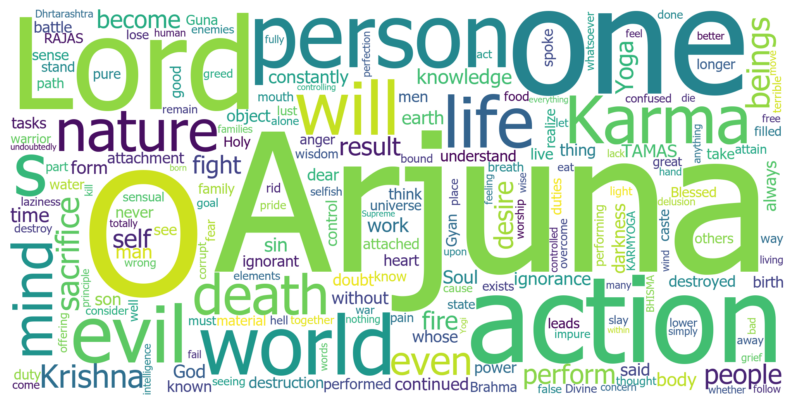

In [30]:
#Creating word cloud for the negative words (English)

from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(collocations=False,background_color="white", font_path='tahoma',width=2000,height=1000)
wc.generate(' '.join(neg['English Translation']))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

(-0.5, 1999.5, 999.5, -0.5)

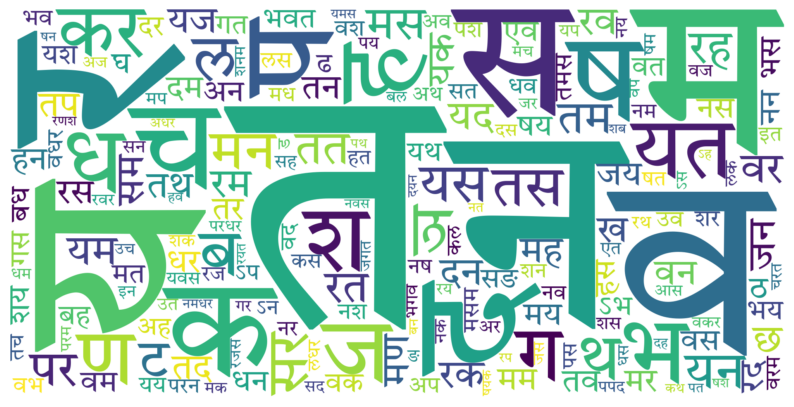

In [40]:
neg_sanskrit =  list(neg['Sanskrit Anuvad'])
neg_sanskrit = ' '.join(neg_sanskrit)

#Creating word cloud for the negative words (Sanskrit)
font = 'font/sanskrit.ttf'
from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(font_path=font, collocations=False,background_color="white",width=2000,height=1000)
wc.generate(neg_sanskrit)
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

(-0.5, 1999.5, 999.5, -0.5)

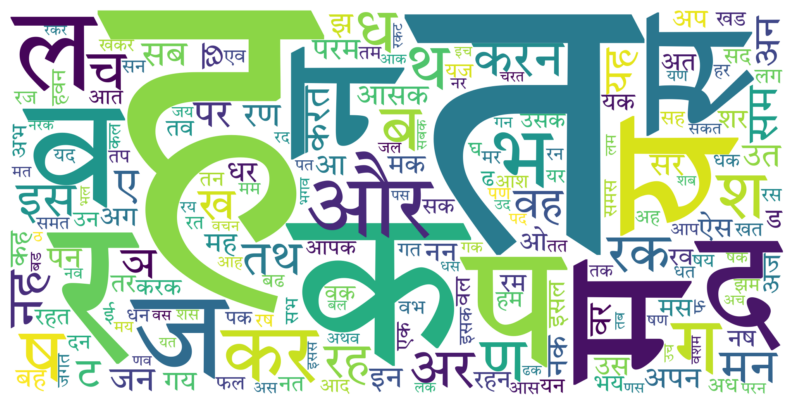

In [34]:
neg_hindi =  list(neg['Hindi Anuvad'])
neg_hindi = ' '.join(neg_hindi)

#Creating word cloud for the negative words (Sanskrit)
font = 'font/hindi.ttf'
from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(font_path=font, collocations=False,background_color="white",width=2000,height=1000)
wc.generate(neg_hindi)
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

### Positive sentiment

In [35]:
pos = df.loc[df['Sentiment Analysis'] == 'POSITIVE']
pos

,Chapter,Verse,Sanskrit Anuvad,Hindi Anuvad,English Translation,Sentiment Analysis
0,Chapter 1,Verse 1.1,धृतराष्ट्र उवाच । धर्मक्षेत्रे कुरुक्षेत्रे सम...,धृतराष्ट्र बोले- हे संजय! धर्मभूमि कुरुक्षेत्र...,"Dhrtarashtra asked of Sanjaya: O SANJAYA, what...",POSITIVE
1,Chapter 1,Verse 1.2,सञ्जय उवाच । दृष्ट्वा तु पाण्डवानीकं व्यूढं दु...,संजय बोले- उस समय राजा दुर्योधन ने व्यूहरचनायु...,Sanjaya explained: Now seeing that the army of...,POSITIVE
2,Chapter 1,Verse 1.3,पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् । व...,हे आचार्य! आपके बुद्धिमान्‌ शिष्य द्रुपदपुत्र ...,"Behold O, Master, the mighty army of the sons ...",POSITIVE
3,Chapter 1,Verse 1.4,अत्र शूरा महेष्वासा भीमार्जुनसमा युधि । युयुधा...,इस सेना में बड़े-बड़े धनुषों वाले तथा युद्ध मे...,"Present here are the mighty archers, peers or ...",POSITIVE
4,Chapter 1,Verse 1.5,धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान् । पुर...,"धृष्टकेतु, चेकिताना, और काशी के बहादुर राजा, प...","Dhrishtaketu, Chekitana, and the valiant king ...",POSITIVE
...,...,...,...,...,...,...
695,Chapter 18,Verse 18.74,संजय उवाच । इत्यहं वासुदेवस्य पार्थस्य च महात्...,सञ्जय बोले —-इस प्रकार मैंने श्री वासुदेव के औ...,"Sanjaya concluded: Thus my dear King, I have r...",POSITIVE
696,Chapter 18,Verse 18.75,व्यासप्रसादाच्छ्रुतवानेतद्गुह्यमहं परम् । योगं...,श्री व्यास जी की कृपा से दिव्य दृष्टि पाकर मैं...,"By the kindness of the Holy poet, Ved O’Vyas, ...",POSITIVE
697,Chapter 18,Verse 18.76,राजन्संस्मृत्य संस्मृत्य संवादमिममद्भुतम् । के...,हे राजन् ! भगवान् श्रीकृष्ण और अर्जुन के इस रह...,"The more I recall these glorious words, my Kin...",POSITIVE
698,Chapter 18,Verse 18.77,तच्च संस्मृत्य संस्मृत्य रूपमत्यद्भुतं हरेः । ...,हे राजन् ! श्रीहरि के उस अत्यन्त विलक्षण रूप क...,"O My King, whenever I remember that most beaut...",POSITIVE


(-0.5, 1999.5, 999.5, -0.5)

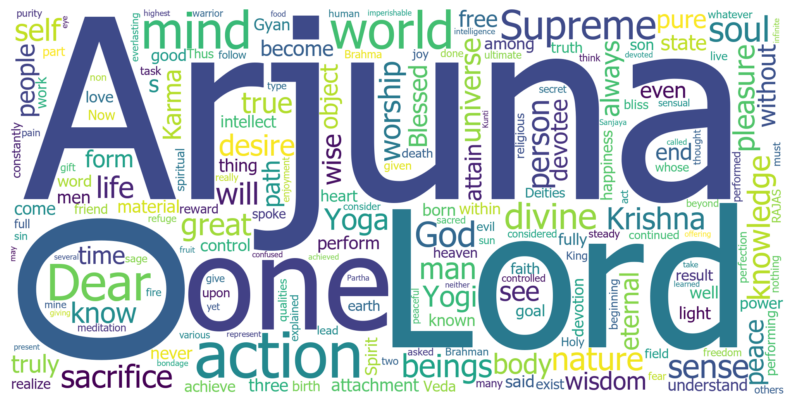

In [36]:
#Creating word cloud for the negative words (English)

from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(collocations=False,background_color="white", font_path='tahoma',width=2000,height=1000)
wc.generate(' '.join(pos['English Translation']))
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

(-0.5, 1999.5, 999.5, -0.5)

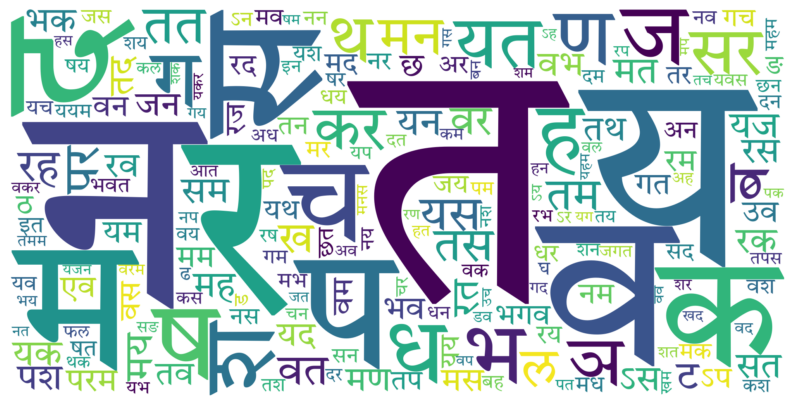

In [37]:
pos_sanskrit =  list(pos['Sanskrit Anuvad'])
pos_sanskrit = ' '.join(pos_sanskrit)

#Creating word cloud for the negative words (Sanskrit)
font = 'font/sanskrit.ttf'
from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(font_path=font, collocations=False,background_color="white",width=2000,height=1000)
wc.generate(pos_sanskrit)
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

(-0.5, 1999.5, 999.5, -0.5)

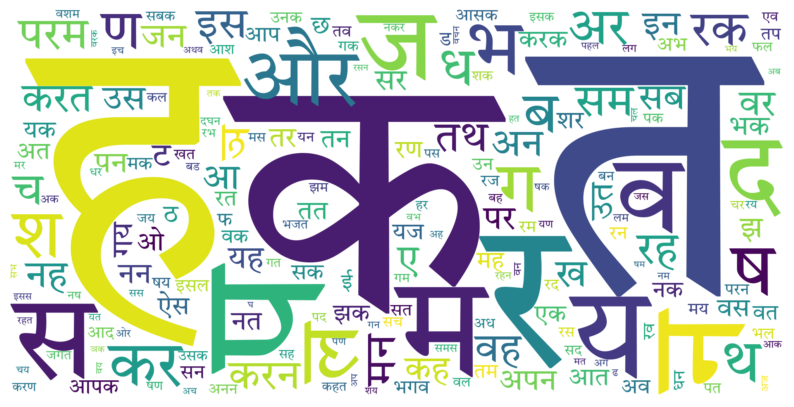

In [41]:
pos_hindi =  list(pos['Hindi Anuvad'])
pos_hindi = ' '.join(pos_hindi)

#Creating word cloud for the negative words (Sanskrit)
font = 'font/hindi.ttf'
from wordcloud import WordCloud, ImageColorGenerator
wc=WordCloud(font_path=font, collocations=False,background_color="white",width=2000,height=1000)
wc.generate(pos_hindi)
plt.figure(figsize=(10,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")